In [1]:
%load_ext autoreload
%autoreload 2

grid size: 23


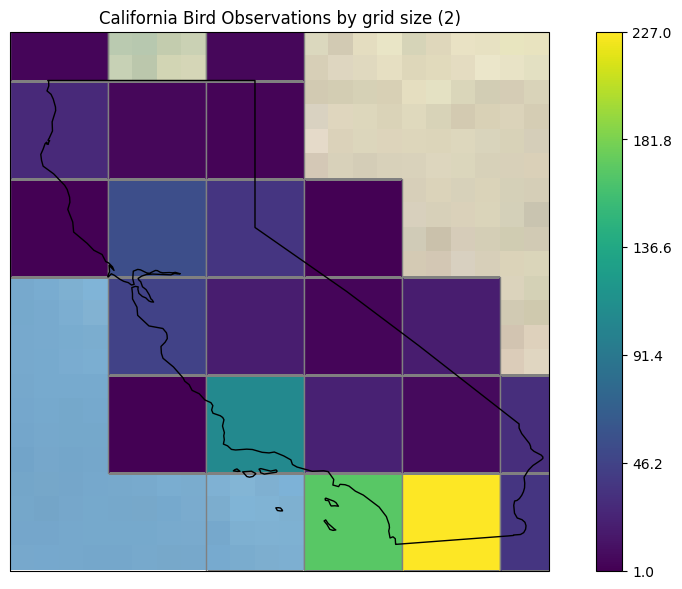

In [2]:
import pandas as pd
from birdcall_distribution.geo import (
    get_shape_us_state,
    generate_grid,
    add_lonlat_columns,
    CA_EXTENT,
)
from birdcall_distribution.plot import dataframe_color_getter, plot_grid
from functools import partial
import matplotlib.pyplot as plt

ca_shape = get_shape_us_state("California")


def draw_ca(grid_dim):
    grid = generate_grid(ca_shape.geometry, CA_EXTENT, (grid_dim, grid_dim))
    print("grid size:", len(grid))

    df = pd.read_csv("../data/raw/birdclef-2022/train_metadata.csv")
    df = df[["primary_label", "latitude", "longitude"]].dropna()
    df = add_lonlat_columns(df, grid)
    df = df[df.grid.notnull()]

    counts_df = pd.DataFrame(df.grid_id.value_counts().reset_index())
    counts_df.columns = ["grid_id", "observations"]
    # NOTE: this is if we want to include null observations
    # all_grid = pd.DataFrame({"grid_id": grid.keys()})
    # counts_df = counts_df.merge(all_grid, on="grid_id", how="outer").fillna(0)

    prop = "observations"
    plot_grid(
        ca_shape.geometry,
        CA_EXTENT,
        grid,
        color_callback=partial(dataframe_color_getter, counts_df, "grid_id", prop),
        vmin=counts_df[prop].min(),
        vmax=counts_df[prop].max(),
        draw_gridline=False,
    )

    plt.title(f"California Bird Observations by grid size ({grid_dim})")
    plt.show()


draw_ca(2)

grid size: 771


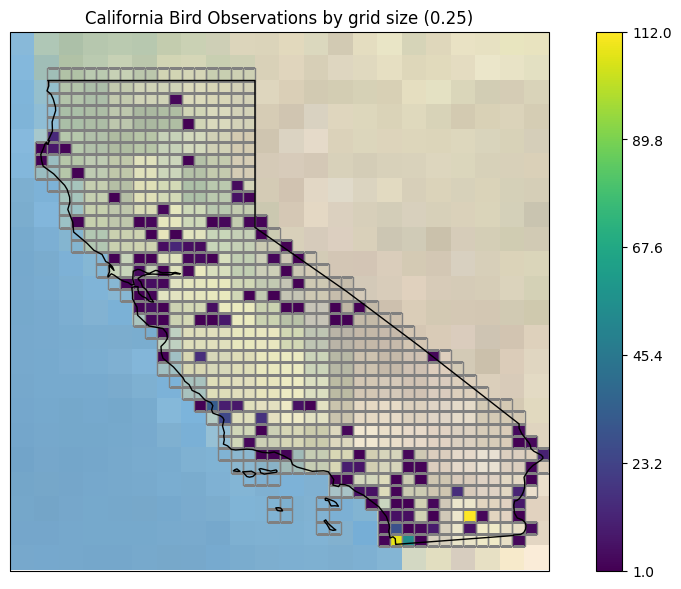

In [3]:
draw_ca(0.25)

grid size: 217


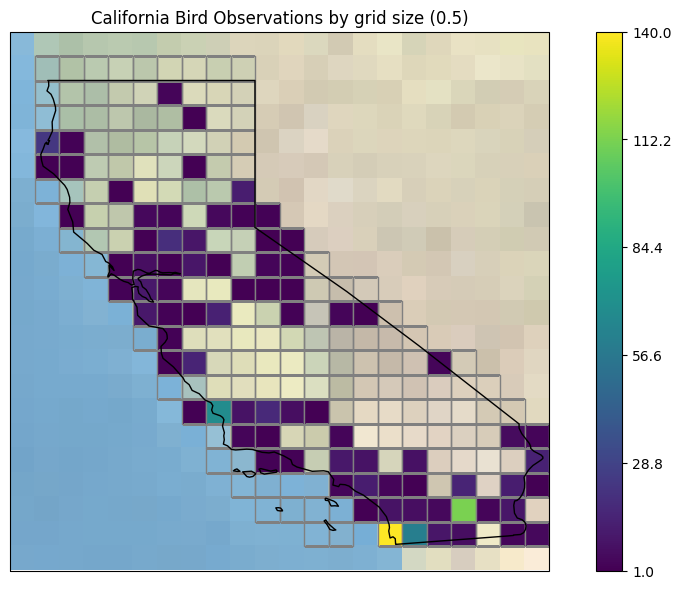

In [4]:
draw_ca(0.5)

grid size: 108


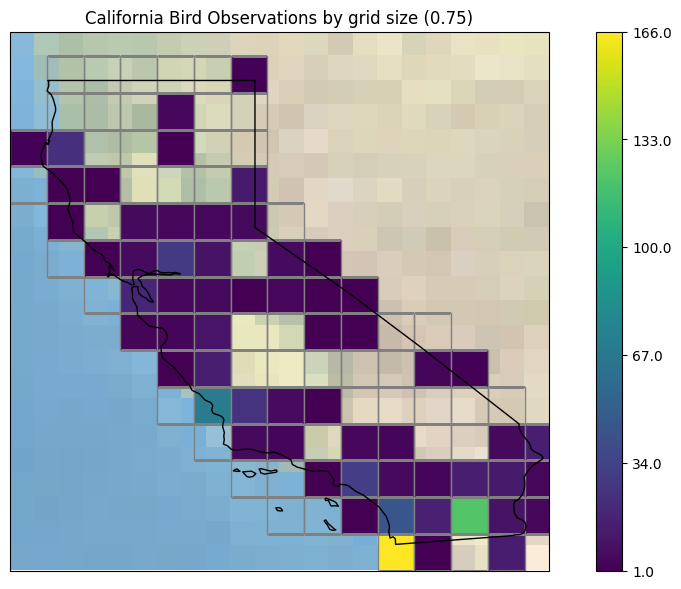

In [5]:
draw_ca(0.75)

grid size: 68


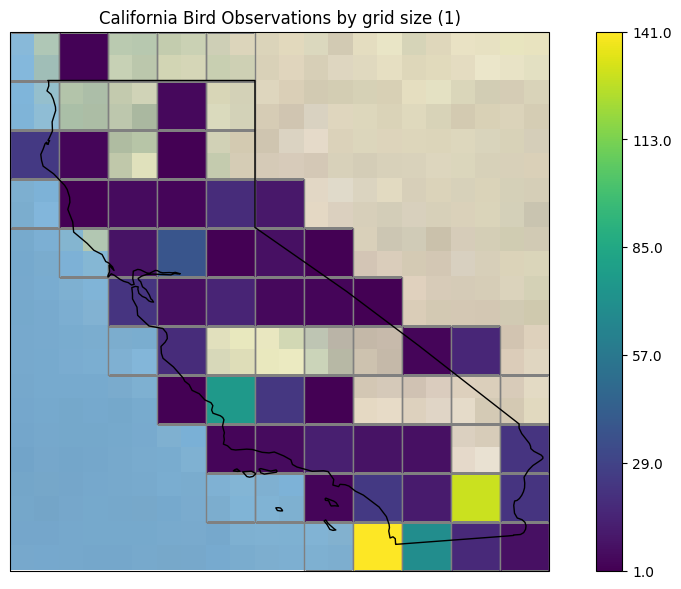

In [6]:
draw_ca(1)